In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
train_data_dir = '/gdrive/My Drive/dataset/train'
validation_data_dir = '/gdrive/My Drive/dataset/val'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
 validation_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')


Found 13125 images belonging to 8 classes.
Found 558 images belonging to 8 classes.


In [5]:
model = Sequential([
    Input(shape=(200,200,3)),
    Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1)),
    Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid'),
    Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid'),
    BatchNormalization(),


    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(8, activation='softmax')
])

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 196, 196, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 94, 32)        1

In [6]:
total_train = 13125
total_val = 558
epochs = 10
batch_size = 500
esc = EarlyStopping(monitor='val_acc', patience=2)

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("/gdrive/My Drive/best_model.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', save_freq=1)

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size,
    callbacks=[checkpoint, esc]
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10

Epoch 00001: loss improved from inf to 3.52502, saving model to /gdrive/My Drive/best_model.h5
 1/26 [>.............................] - ETA: 0s - loss: 3.5250 - accuracy: 0.1562
Epoch 00001: loss improved from 3.52502 to 3.21484, saving model to /gdrive/My Drive/best_model.h5
 2/26 [=>............................] - ETA: 1:53 - loss: 3.2148 - accuracy: 0.3438
Epoch 00001: loss did not improve from 3.21484
 3/26 [==>...........................] - ETA: 2:28 - loss: 3.3166 - accuracy: 0.3958
Epoch 00001: loss did not improve from 3.21484
 4/26 [===>..........................] - ETA: 2:41 - loss: 3.3931 - accuracy: 0.4141
Epoch 00001: loss did not improve from 3.21484
 5/26 [====>.........................] - ETA: 2:37 - loss: 3.4809 - accuracy: 0.4250
Epoch 00001: loss did not improve from 3.21484
 6/26 [=====>........................] - ETA: 2:34 - loss: 3.3671 - accuracy: 0.4167
Epoch 00001: loss did 

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

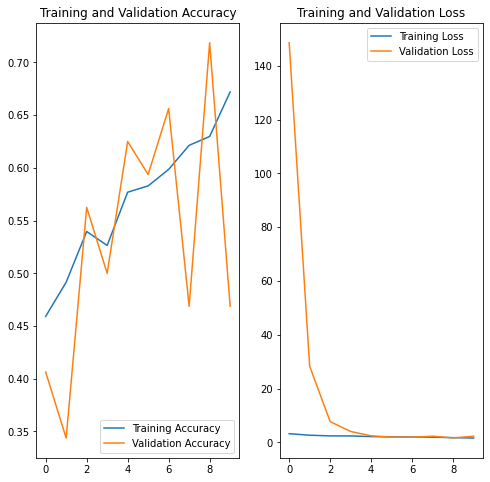

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
save_dir = "/gdrive/My Drive"
json_file = open(save_dir+"/Abbos.json", "w")
model_json = model.to_json()
json_file.write(model_json)
json_file.close()
model.save_weights(save_dir+"/Abbos_weights.h5")